In [42]:
import pandas as pd

import catboost
from catboost import CatBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [43]:
# Data processing, metrics and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix,  roc_curve, precision_recall_curve, accuracy_score, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier

# Stats
import scipy.stats as ss
from scipy import interp
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

from sklearn.metrics import accuracy_score,classification_report, f1_score, precision_score, recall_score
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from imblearn.metrics import geometric_mean_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

In [44]:
column_names = ["Suit of card #1", "Rank of card #1", "Suit of card #2", "Rank of card #2", "Suit of card #3", "Rank of card #3", "Suit of card #4", "Rank of card #4", "Suit of card #5", "Rank of card #5", "Poker Hand"]
poker_train = pd.read_csv('poker-training.data', header=None, names=column_names)
poker_test = pd.read_csv('poker-testing.data', header=None, names=column_names)
print("First 5 testing data")
poker_test.head() 

First 5 testing data


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0


In [45]:
print("First 5 training data")
poker_train.head()

First 5 training data


,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Poker Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [46]:
# Assuming you have already loaded the dataset using Pandas and assigned it to a DataFrame called 'df'
X_train = poker_train.drop('Poker Hand', axis='columns') # Features (all columns except the target column 'label')
Y_train = poker_train["Poker Hand"]  # Target column


X_test = poker_test.drop('Poker Hand', axis='columns')
Y_test = poker_test["Poker Hand"]

In [47]:
cat_features = []  # List of column names that are categorical (if any)

# Create the CatBoost classifier model
model = catboost.CatBoostClassifier(iterations=100, learning_rate=0.5, depth=6, loss_function='MultiClass')

# Fit the model on the training data
model.fit(X_train, Y_train, cat_features=cat_features)


0:	learn: 1.2233580	total: 18.6ms	remaining: 1.84s
1:	learn: 1.0954660	total: 33.6ms	remaining: 1.65s
2:	learn: 1.0164856	total: 48.3ms	remaining: 1.56s
3:	learn: 0.9609907	total: 62.8ms	remaining: 1.51s
4:	learn: 0.9326548	total: 77.8ms	remaining: 1.48s
5:	learn: 0.9150747	total: 93.3ms	remaining: 1.46s
6:	learn: 0.9050973	total: 108ms	remaining: 1.44s
7:	learn: 0.8751133	total: 123ms	remaining: 1.42s
8:	learn: 0.8614129	total: 138ms	remaining: 1.4s
9:	learn: 0.8376048	total: 153ms	remaining: 1.38s
10:	learn: 0.8325821	total: 168ms	remaining: 1.36s
11:	learn: 0.8283476	total: 183ms	remaining: 1.34s
12:	learn: 0.8249817	total: 199ms	remaining: 1.33s
13:	learn: 0.8217067	total: 214ms	remaining: 1.32s
14:	learn: 0.8119277	total: 230ms	remaining: 1.3s
15:	learn: 0.8063219	total: 246ms	remaining: 1.29s
16:	learn: 0.8014065	total: 264ms	remaining: 1.29s
17:	learn: 0.7984580	total: 282ms	remaining: 1.28s
18:	learn: 0.7887907	total: 298ms	remaining: 1.27s
19:	learn: 0.7858356	total: 314ms	rem

In [48]:
Y_test.value_counts()

Poker Hand
0    501209
1    422498
2     47622
3     21121
4      3885
5      1996
6      1424
7       230
8        12
9         3
Name: count, dtype: int64

In [49]:
# Predict the target labels for the test data
Y_pred = model.predict(X_test)


In [50]:
accuracy = accuracy_score(Y_test, Y_pred) 
print("Accuracy:", accuracy) 

Accuracy: 0.692904


In [51]:
model.score(X_test, Y_test)

0.692904

In [52]:
score = classification_report(Y_test, Y_pred)
print("Score:", score)

c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Score:               precision    recall  f1-score   support

           0       0.72      0.84      0.78    501209
           1       0.65      0.62      0.64    422498
           2       0.51      0.08      0.14     47622
           3       0.62      0.10      0.17     21121
           4       0.15      0.02      0.03      3885
           5       0.65      0.04      0.08      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.69   1000000
   macro avg       0.33      0.17      0.18   1000000
weighted avg       0.68      0.69      0.67   1000000



c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [53]:
print("f1_score", f1_score(Y_test, Y_pred,average="weighted"))
print("Recall", recall_score(Y_test, Y_pred,average="weighted"))
print("Precision", precision_score(Y_test, Y_pred,average="weighted"))

f1_score 0.6708829296605447
Recall 0.692904
Precision 0.6779580554350588


c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [54]:
cm = confusion_matrix(Y_test, Y_pred)
print(cm )

[[423047  78107     18      4     15     18      0      0      0      0]
 [155271 263647   2800    525    226     25      1      1      0      2]
 [  4387  38733   3959    475     66      1      0      1      0      0]
 [   801  17563    608   2108     37      0      2      2      0      0]
 [   103   3681     34      5     61      0      0      0      0      1]
 [  1760    154      0      0      0     82      0      0      0      0]
 [     0    929    290    203      2      0      0      0      0      0]
 [     0    102     39     85      4      0      0      0      0      0]
 [     0     10      0      0      2      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]


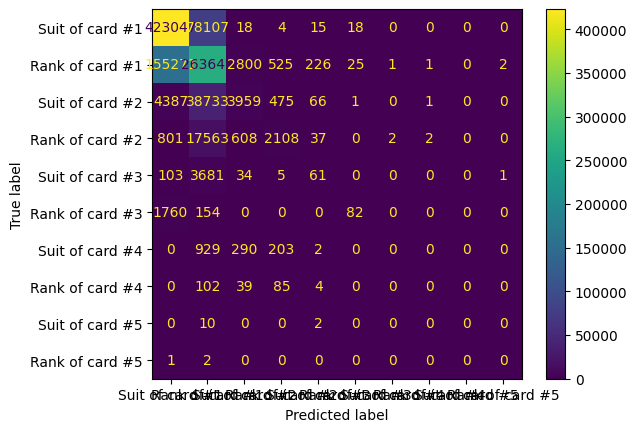

In [55]:
matrix_names = ["Suit of card #1", "Rank of card #1", "Suit of card #2", "Rank of card #2", "Suit of card #3", "Rank of card #3", "Suit of card #4", "Rank of card #4", "Suit of card #5", "Rank of card #5"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=matrix_names)
disp.plot()
plt.grid(False)

In [56]:
print("Mean_Squared_Error",mean_squared_error(Y_test, Y_pred))
print("G-Mean", geometric_mean_score(Y_test, Y_pred))
print("kappa", cohen_kappa_score( Y_test, Y_pred))
print("MCC", matthews_corrcoef(Y_test, Y_pred))

Mean_Squared_Error 0.49479
G-Mean 0.0


c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



kappa 0.42698300708400805
MCC 0.43176565649435783


In [57]:
#after sampling
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with desired settings
smote = SMOTE(sampling_strategy='auto', k_neighbors=3, random_state=42)

# Apply SMOTE to training data
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)


In [58]:
# Instantiate the CatBoost model
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, loss_function='MultiClass')

# Fit the model on the resampled training data
model.fit(X_train_resampled, Y_train_resampled)

# Predict on test data
y_pred = model.predict(X_test)

0:	learn: 2.1193178	total: 83ms	remaining: 8.22s
1:	learn: 1.9948882	total: 168ms	remaining: 8.22s
2:	learn: 1.9127215	total: 254ms	remaining: 8.21s
3:	learn: 1.8235411	total: 358ms	remaining: 8.6s
4:	learn: 1.7496859	total: 434ms	remaining: 8.25s
5:	learn: 1.6884526	total: 507ms	remaining: 7.94s
6:	learn: 1.6306918	total: 582ms	remaining: 7.72s
7:	learn: 1.5858997	total: 655ms	remaining: 7.53s
8:	learn: 1.5162636	total: 727ms	remaining: 7.35s
9:	learn: 1.4720078	total: 794ms	remaining: 7.14s
10:	learn: 1.4299251	total: 862ms	remaining: 6.98s
11:	learn: 1.3916856	total: 947ms	remaining: 6.94s
12:	learn: 1.3626749	total: 1.03s	remaining: 6.91s
13:	learn: 1.3239427	total: 1.11s	remaining: 6.83s
14:	learn: 1.2954216	total: 1.19s	remaining: 6.75s
15:	learn: 1.2686916	total: 1.26s	remaining: 6.62s
16:	learn: 1.2329794	total: 1.33s	remaining: 6.5s
17:	learn: 1.2025930	total: 1.4s	remaining: 6.38s
18:	learn: 1.1808891	total: 1.48s	remaining: 6.33s
19:	learn: 1.1555865	total: 1.57s	remaining: 

In [59]:
# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

print(accuracy)

0.489145


In [61]:
model.score(X_test, Y_test)

0.489145

In [63]:
score = classification_report(Y_test, Y_pred)
print("Score:", score)

c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Score:               precision    recall  f1-score   support

           0       0.72      0.84      0.78    501209
           1       0.65      0.62      0.64    422498
           2       0.51      0.08      0.14     47622
           3       0.62      0.10      0.17     21121
           4       0.15      0.02      0.03      3885
           5       0.65      0.04      0.08      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.00      0.00      0.00         3

    accuracy                           0.69   1000000
   macro avg       0.33      0.17      0.18   1000000
weighted avg       0.68      0.69      0.67   1000000



c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



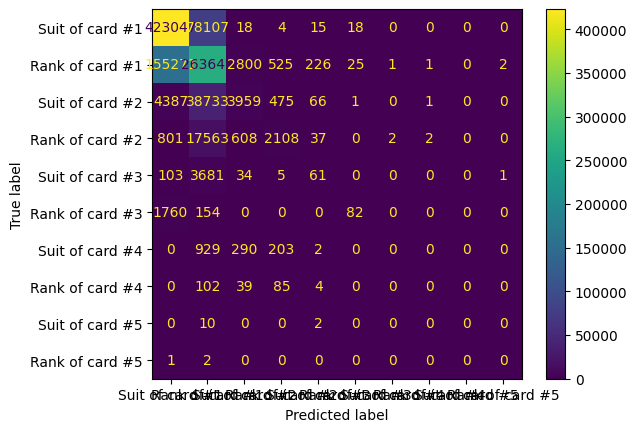

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=matrix_names)
disp.plot()
plt.grid(False)

In [64]:
print("f1_score", f1_score(Y_test, Y_pred,average="weighted"))
print("Recall", recall_score(Y_test, Y_pred,average="weighted"))
print("Precision", precision_score(Y_test, Y_pred,average="weighted"))

f1_score 0.6708829296605447
Recall 0.692904
Precision 0.6779580554350588


c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [66]:
cm = confusion_matrix(Y_test, Y_pred)
print("Matrix:" , cm )

Matrix: [[423047  78107     18      4     15     18      0      0      0      0]
 [155271 263647   2800    525    226     25      1      1      0      2]
 [  4387  38733   3959    475     66      1      0      1      0      0]
 [   801  17563    608   2108     37      0      2      2      0      0]
 [   103   3681     34      5     61      0      0      0      0      1]
 [  1760    154      0      0      0     82      0      0      0      0]
 [     0    929    290    203      2      0      0      0      0      0]
 [     0    102     39     85      4      0      0      0      0      0]
 [     0     10      0      0      2      0      0      0      0      0]
 [     1      2      0      0      0      0      0      0      0      0]]


In [67]:
print("Mean_Squared_Error",mean_squared_error(Y_test, Y_pred))
print("G-Mean", geometric_mean_score(Y_test, Y_pred))
print("kappa", cohen_kappa_score( Y_test, Y_pred))
print("MCC", matthews_corrcoef(Y_test, Y_pred))

Mean_Squared_Error 0.49479
G-Mean 0.0


c:\Users\dhiks\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



kappa 0.42698300708400805
MCC 0.43176565649435783
